(sec-cxgate)=
# Controlled X gate

## Definition

**Operational Definition**

$\texttt{CX}_{q_0,q_1}|q_1\, q_0\rangle$ means "Apply `X` to $q_1$ if $q_0=1$ and do nothing otherwise."  Mathematically, it is expressed as

$$
\texttt{CX}_{q_0,q_1} = \texttt{I} \otimes |0\rangle\langle 0| + \texttt{X} \otimes |1\rangle\langle 1|
$$

Swapping the source and target qubits,

$\texttt{CX}_{q_1,q_0}|q_1\, q_0\rangle$ means "Apply `X` to $q_0$ if $q_1=1$ and do nothing otherwise."  Mathematically, it is expressed as

$$
\texttt{CX}_{q_1,q_0} = |0\rangle\langle 0| \otimes \texttt{I}   +   |1\rangle\langle 1| \otimes \texttt{X}
$$

**Transformation**

`CX` transforms computational basis as follows:

>$$
\begin{align}
\texttt{CX}_{q_0,q_1} \lvert 00\rangle &= \lvert 00\rangle \\
\texttt{CX}_{q_0,q_1} \lvert 01\rangle &= \lvert 11\rangle \\
\texttt{CX}_{q_0,q_1} \lvert 10\rangle &= \lvert 10\rangle \\
\texttt{CX}_{q_0,q_1} \lvert 11\rangle &= \lvert 01\rangle 
\end{align}
$$

>$$
\begin{align}
\texttt{CX}_{q_1,q_0} \lvert 00\rangle &= \lvert 00\rangle \\
\texttt{CX}_{q_1,q_0} \lvert 01\rangle &= \lvert 01\rangle \\
\texttt{CX}_{q_1,q_0} \lvert 10\rangle &= \lvert 11\rangle \\
\texttt{CX}_{q_1,q_0} \lvert 11\rangle &= \lvert 10\rangle 
\end{align}
$$

**Matrix representation**

$$
\texttt{CX}_{q_0,q_1} = \begin{bmatrix} 1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}
$$

$$
\texttt{CX}_{q_1,q_0} = \begin{bmatrix} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}
$$


<div class="alert alert-block alert-info">

    
$\texttt{CX}$ swaps the phase of $|01\rangle$ and $|11\rangle$.
    
$$
\texttt{CX}(q_0,q_1) \left (a |00\rangle + b |01\rangle + c |10\rangle + d |11\rangle \right ) =
\left (a |00\rangle + d |01\rangle + c |10\rangle + b |11\rangle \right )
$$

    
</div>

We will discuss action of `CX` on other basis in the section of [Phase Kickbak](sec:phase-kickback).

In [1]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(2)
# CX_{q0,q1}
qc.cx(0,1)
# CX_{q1,q0}
qc.cx(1,0)

print(qc)

          ┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘     


## Acting on superposition state


`CX` swaps the coefficients of $|01\rangle$ and $|11\rangle$.

$$
\text{CX}_{q_0,q_1} \left (c_{00} |00\rangle + c_{01} |01\rangle + c_{10} |10\rangle + c_{11} |11\rangle \right ) =
c_{00} |00\rangle + c_{11} |01\rangle + c_{10} |10\rangle + c_{01} |11\rangle
$$

The following Qiskit example deomnstrate it.

In [12]:
from qiskit import *

qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)

qc.x([0,1])
qc.h([0,1])

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤├───┤
q_1: ┤ X ├┤ H ├
     └───┘└───┘

In [13]:
from qiskit.quantum_info import Statevector
# state before applying CX
print("State before applying CX.")
Statevector(qc).draw('latex')

State before applying CX


<IPython.core.display.Latex object>

In [14]:
qc.cx(0,1)
qc.draw()

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤├───┤┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

In [15]:
# state after applyiong CX
print("State after applying CX.")
Statevector(qc).draw('latex')

State before applying CX


<IPython.core.display.Latex object>

Compare the states before and after applying `CX` and find how the coefficients changed.

:::{admonition} Does `CX` preserve the source qubit?
:class: warning

The definition of `CX` seems indicating that only the state of the target qubit is modified and the state of the source qubit remains the same.  Surprisingly, that is not true.  In some cases, the state of the source qubit also changes.

Let us look at the above example more carefully.  The state before applying `CX` is

$$
\frac{1}{2}\left(|00\rangle - |01\rangle - |10\rangle + |11\rangle\right) = 
\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) = |-\rangle\otimes |-\rangle
$$

and after applying `CX`,

$$
\frac{1}{2}\left(|00\rangle + |01\rangle - |10\rangle - |11\rangle\right) = 
\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) = |-\rangle\otimes |+\rangle
$$

Notice that the source qubit is transformed from $|-\rangle$ to $|+\rangle$.  This kind of transformation is called *phase kickback* since the phase of the source qubit changed.  The phase kickback is a ubiquitous strategy in quantum algorithms.  See the next subsection.

:::

## Acting on the x-basis

We look at the action of `CX` on other basis, namely $|\pm\pm\rangle$.  We assume that $q_0$ is the control qubit and $q_1$ is the target. 

$$
\begin{align}
\texttt{CX}(q_0,q_1) |++\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle + |01\rangle  + |10\rangle + |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle + |11\rangle  + |10\rangle + |01\rangle \right) &= |++\rangle \\
\texttt{CX}(q_0,q_1) |+-\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle - |01\rangle  + |10\rangle - |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle - |11\rangle  + |10\rangle - |11\rangle \right) &= |+-\rangle \\
\texttt{CX}(q_0,q_1) |-+\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle + |01\rangle  - |10\rangle - |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle + |11\rangle  - |10\rangle - |01\rangle \right) &= |--\rangle \\
\texttt{CX}(q_0,q_1) |--\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle - |01\rangle  - |10\rangle + |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle - |11\rangle  - |10\rangle + |01\rangle \right) &= |-+\rangle
\end{align}
$$

This transformation can be described as "Apply `Z` to $q_0$ if $q_1=-$ and do nothing oterwise." Interestingly, now $q_1$ is the control qubit and $q_0$ is the target.  Yes, this operation is still "Apply `X` to $q_1$ if $q_0=1$ and do nothing otherwise."  The two operations are equivalent.

The reversal of control-target relation is known as signature of *phase kickback*.  Other controlled gates also show phase kickback.  The details will be discussed in a separate section.

## Examples

In [41]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

---
__Example 1__

WHat will happen if the state of control bit has uncertainty?  In this example, the control qubit is in $|+\rangle$.  That means $q_0$ is neither $|0\rangle$ nor $|1\rangle$ (but both).

$\qquad \texttt{CX} \left( |0\rangle \otimes |+\rangle \right) = \left(|00\rangle + |11\rangle\right)/\sqrt{2}$

The result is a fully entangled state. The state of $q_0$ is no longer a state vector despite that no opertion is done on $q_0$.   This is a common procedure to  creates the Bell state.

In [18]:
# create twoqubits
qc = QuantumCircuit(2)

# create |0>^|+>
qc.h(0)

# show the initial state
psi=Statevector(qc)
print("Initial State")
psi.draw('latex')

Initial State


<IPython.core.display.Latex object>

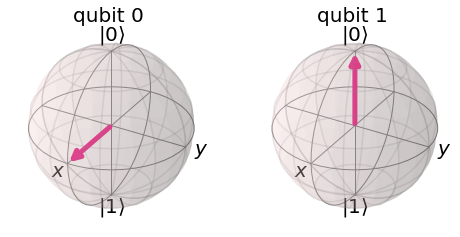

In [15]:
# it is a product state
psi.draw('bloch')

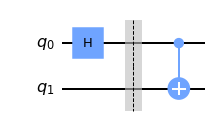

In [19]:
qc.barrier()
qc.cnot(0,1)
qc.draw('mpl')

In [20]:
# Show the result 
psi=Statevector(qc)
print("Final State")
psi.draw('latex')

Final State


<IPython.core.display.Latex object>

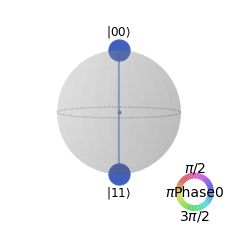

In [25]:
# it's an entangled state.  Use qsphere.
plot_state_qsphere(psi,figsize=(4,4))

---

__Example 2__  

We consider the reversed process.  The input state is entangled and thus $q_0$ is not in a unique pure state.  FUrthermore, the target qubit is fully correlated with the control qubit. WHat happens to the entanglement.

$\qquad \texttt{CX} \left(|00\rangle + |11\rangle\right)/\sqrt{2} = |0\rangle \otimes |+\rangle$

Notice that the outcome is a product state and thus the entanglement in the Bell state is completely destroyed.  Notice that $\texttt{CX}$ is reversible gate.

In [27]:
# set two qubits
qc = QuantumCircuit(2)

# generate a Bell state
qc.h(0)
qc.cx(0,1)
psi=Statevector(qc)
print("Initial State")
psi.draw('latex')

Initial State


<IPython.core.display.Latex object>

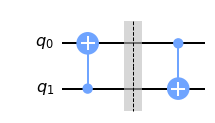

In [119]:
# apply CX
qc.barrier()
qc.cnot(0,1)
qc.draw('mpl')

In [29]:
# confirm that |11> is replaced with |01>
psi=Statevector(qc)
print("Final State")
psi.draw('latex')

Final State


<IPython.core.display.Latex object>

In [49]:
# confirm that the result is a product state |0>^|1>
p2=psi.draw('bloch')

(sec:phase-kickback)=
# Phase Kickback

In this section, we look at the action of `CX` on other basis, namely $|\pm\pm\rangle$.  We assume that $q_0$ is the control qubit and $q_1$ is the target.  Note that $|\pm$ is superposition of $|0\rangle$ and $|1\rangle$and thus the value on the control qubit is not certain in $Z$-basis.  The $X$-basis vectors are transformed as

$$
\begin{align}
\texttt{CX} |++\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle + |01\rangle  + |10\rangle + |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle + |11\rangle  + |10\rangle + |01\rangle \right) &= |++\rangle \\
\texttt{CX} |+-\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle - |01\rangle  + |10\rangle - |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle - |11\rangle  + |10\rangle - |11\rangle \right) &= |+-\rangle \\
\texttt{CX} |-+\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle + |01\rangle  - |10\rangle - |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle + |11\rangle  - |10\rangle - |01\rangle \right) &= |--\rangle \\
\texttt{CX} |--\rangle &= \frac{1}{2} \texttt{CX} \left(|00\rangle - |01\rangle  - |10\rangle + |11\rangle \right)
&&=  \frac{1}{2} \left(|00\rangle - |11\rangle  - |10\rangle + |01\rangle \right) &= |-+\rangle
\end{align}
$$

which can be stated as

> If $q_1=|-\rangle$,   
> &emsp; apply $\texttt{Z}$ to $q_0$   
> else   
>  &emsp; do nothing   

Interestingly, now $q_1$ is the control qubit and $\texttt{Z}$ is applied on target $q_0$.  The reversal of control-target relation is known as _phase kickback_.   The phase kickback plays important role in quantum computation.

__Example 3__

Remembering that the Hadamard gate changes from $Z$-basis to $X$-basis or vice versa.  We can construct a circuit with $\texttt{H}$ and $\texttt{CX}$. The phase kickbak operation is done by the following circuit:

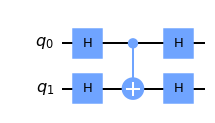

In [90]:
qc = QuantumCircuit(2)      
qc.h([0,1])
qc.cx(0,1)
qc.h([0,1])
qc.draw('mpl')

However, this must be equivalent to 

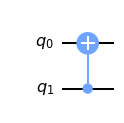

In [91]:
qc = QuantumCircuit(2)
qc.cx(1,0)   
qc.draw('mpl')        

In [116]:
#
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

# the first circuit
qc = QuantumCircuit(2)      
qc.h([0,1])
qc.cx(0,1)
qc.h([0,1])
op1=Operator(qc)

# the second circuit
qc = QuantumCircuit(2) 
qc.cx(1,0)

op2=Operator(qc)

In [114]:
print("Unitary operator for the first circuit")
array_to_latex(op1)

Unitary operator for the first circuit


<IPython.core.display.Latex object>

In [115]:
print("Unitary operator for the second circuit")
array_to_latex(op2)

Unitary operator for the second circuit


<IPython.core.display.Latex object>

In [118]:
print("Two operations are equivalent:", op1==op2)

Two operations are equivalent: True
